In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [18]:
import glob
from Bio import Phylo

import numpy as np
from matplotlib import pyplot as plt

from scipy import stats

# Testing first on the basic eukaryotic set

In [3]:
def is_monophyletic_all(hypothetical_root, tree, test_set, is_mono):
    if tree.is_monophyletic(test_set):
        is_mono = True
    if len(hypothetical_root.clades) == 2:
        l_clade, r_clade = hypothetical_root.clades
        if l_clade.branch_length > 0:
            tree.root_with_outgroup(l_clade, outgroup_branch_length=10e-10)
            is_mono = is_monophyletic_all(l_clade, tree, test_set, is_mono)
        if r_clade.branch_length > 0:
            tree.root_with_outgroup(r_clade, outgroup_branch_length=10e-10)
            is_mono = is_monophyletic_all(r_clade, tree, test_set, is_mono)
    elif len(hypothetical_root.clades) == 1:
        l_clade = hypothetical_root.clades[0]
        if l_clade.branch_length > 0:
            tree.root_with_outgroup(l_clade, outgroup_branch_length=10e-10)
            is_mono = is_monophyletic_all(l_clade, tree, test_set, is_mono)
    elif len(hypothetical_root.clades) == 0:
        return is_mono
    return is_mono

# tree.get_terminals()
# tree.is_monophyletic(metazoa)
# tree = Phylo.read('../test.ete3.newick', 'newick', rooted=False)
# tree = mp_root_adhock(tree)
# tree.is_monophyletic([term for term in tree.get_terminals() if\
#                       term.name in ['7165', '7425', '7460', '121225', '7227', '6239']])

In [4]:
id_species_dict = {}
with open('../Tria_et_al_data/eukaryotes/ID_to_Species.txt', 'r') as infile:
    texty = infile.readlines()
    for line in texty[1:]:
        sl = line.split('\t')
        id_species_dict[sl[0]] = sl[1]
print(len(id_species_dict.keys()))

species_seqid_dict = {}
with open('../Tria_et_al_data/eukaryotes/cluster_to_seqid.txt', 'r') as infile:
    texty = infile.readlines()
    for line in texty:
        sl = line.split('\t')
        if sl[0] == 'KOG0725':
            species_seqid_dict[sl[1]] = sl[2].strip()
print(len(species_seqid_dict.keys()))

41
41


In [5]:
metazoa = ['10090', '121225', '9606', '30611', '8364', '7955', '8128', '8090',\
          '7668', '7460', '7425', '7227', '7165', '6239']

In [66]:
# trees_dir = '../Data/euk_trees/*Rooted.MPAJH'
# ideal_species_n = 31

# trees_dir = '../Data/pruned_euk_trees/*_9_meta.nwk.Rooted.MPAJH'
# ideal_species_n = 22

trees_dir = '../Data/pruned_euk_trees/*_12_meta.nwk.Rooted.MPAJH'
ideal_species_n = 19

# trees_dir = '../Data/pruned_euk_trees/*_15_notmeta.nwk.Rooted.MPAJH'
# ideal_species_n = 16


# methods = ['.MPAJH', '.MLAJH']
methods = ['.MPAJH', '.MLAJH', '.MADAJH']
accuracy_dict = {}
for method in methods:
    accuracy_dict[method] = []

trees_tested = []

for tree_loc in glob.glob(trees_dir)[:500]:
    print(tree_loc)
    test_tree = Phylo.read(tree_loc, 'newick', rooted=True)
    if len(test_tree.get_terminals()) != ideal_species_n:
        continue
    testy = [term for term in test_tree.get_terminals() if\
                      term.name in metazoa]
    valid = is_monophyletic_all(test_tree.root, test_tree, testy, False)
    if valid == False:
        continue
        
    trees_tested.append(tree_loc)
    for method in methods:
        my_tree = Phylo.read(tree_loc.replace('.MPAJH', method), 'newick', rooted=True)
        metazoa_clades = [term for term in my_tree.get_terminals() if\
                          term.name in metazoa]
        if set(metazoa_clades) == set(my_tree.root.clades[0].get_terminals()) or \
            set(metazoa_clades) == set(my_tree.root.clades[1].get_terminals()):
            accuracy_dict[method].append(1)
        else:
            accuracy_dict[method].append(0)
        
    ###ML
#     ml_tree = Phylo.read(tree_loc.replace('.MPAJH', '.MLAJH'), 'newick', rooted=True)
#     metazoa_clades = [term for term in ml_tree.get_terminals() if\
#                       term.name in metazoa]
#     if set(metazoa_clades) == set(ml_tree.root.clades[0].get_terminals()) or \
#         set(metazoa_clades) == set(ml_tree.root.clades[1].get_terminals()):
#         print('ML correct!')
            
#     ###ML        
#     ml_tree = max_likelihood_root(tree)
#     if set(testy) == set(ml_tree.root.clades[0].get_terminals()) or \
#         set(testy) == set(ml_tree.root.clades[1].get_terminals()):
#             ml_success_rate += 1
#     ###MAD
#     testy = [term for term in mad_tree.get_terminals() if\
#                   term.name in metazoa]
#     if set(testy) == set(mad_tree.root.clades[0].get_terminals()) or \
#         set(testy) == set(mad_tree.root.clades[1].get_terminals()):
#             mad_success_rate += 1
    

../Data/pruned_euk_trees/KOG2231.faa.aln.pruned_12_meta.nwk.Rooted.MPAJH
../Data/pruned_euk_trees/KOG3767.faa.aln.pruned_12_meta.nwk.Rooted.MPAJH
../Data/pruned_euk_trees/KOG1822.faa.aln.pruned_12_meta.nwk.Rooted.MPAJH
../Data/pruned_euk_trees/KOG1191.faa.aln.pruned_12_meta.nwk.Rooted.MPAJH
../Data/pruned_euk_trees/KOG2270.faa.aln.pruned_12_meta.nwk.Rooted.MPAJH
../Data/pruned_euk_trees/KOG0925.faa.aln.pruned_12_meta.nwk.Rooted.MPAJH
../Data/pruned_euk_trees/KOG1443.faa.aln.pruned_12_meta.nwk.Rooted.MPAJH
../Data/pruned_euk_trees/KOG1863.faa.aln.pruned_12_meta.nwk.Rooted.MPAJH
../Data/pruned_euk_trees/KOG0014.faa.aln.pruned_12_meta.nwk.Rooted.MPAJH
../Data/pruned_euk_trees/KOG2698.faa.aln.pruned_12_meta.nwk.Rooted.MPAJH
../Data/pruned_euk_trees/KOG2330.faa.aln.pruned_12_meta.nwk.Rooted.MPAJH
../Data/pruned_euk_trees/KOG1128.faa.aln.pruned_12_meta.nwk.Rooted.MPAJH
../Data/pruned_euk_trees/KOG1113.faa.aln.pruned_12_meta.nwk.Rooted.MPAJH
../Data/pruned_euk_trees/KOG2929.faa.aln.pruned_12_

In [67]:
np.sum(accuracy_dict['.MPAJH']), np.sum(accuracy_dict['.MLAJH']), np.sum(accuracy_dict['.MADAJH'])

(170, 151, 136)

In [68]:
len(trees_tested)

492

In [69]:
np.array([np.sum(accuracy_dict['.MPAJH']),\
         np.sum(accuracy_dict['.MLAJH']),\
         np.sum(accuracy_dict['.MADAJH'])])/len(trees_tested)

array([ 0.34552846,  0.30691057,  0.27642276])

In [70]:
success = []
failure = []
for i, tree_loc in enumerate(trees_tested):  
    if accuracy_dict['.MADAJH'][i] == 1 and accuracy_dict['.MPAJH'][i] == 0:
        mad_tree = Phylo.read(tree_loc.replace('.MPAJH', '.MADAJH'), 'newick', rooted=True)
        temp_bl = mad_tree.root.clades[0].branch_length + mad_tree.root.clades[1].branch_length
        smallest = min(mad_tree.root.clades[0].total_branch_length()-mad_tree.root.clades[0].branch_length,\
                       mad_tree.root.clades[1].total_branch_length()-mad_tree.root.clades[1].branch_length)
        success.append(smallest/(mad_tree.total_branch_length()-temp_bl))
    
    elif accuracy_dict['.MADAJH'][i] == 0 and accuracy_dict['.MPAJH'][i] == 1:
        mp_tree = Phylo.read(tree_loc.replace('.MPAJH', '.MPAJH'), 'newick', rooted=True)
        temp_bl = mp_tree.root.clades[0].branch_length + mp_tree.root.clades[1].branch_length
        smallest = min(mp_tree.root.clades[0].total_branch_length()-mp_tree.root.clades[0].branch_length,\
                       mp_tree.root.clades[1].total_branch_length()-mp_tree.root.clades[1].branch_length)
        failure.append(smallest/(mp_tree.total_branch_length()-temp_bl))
        


In [71]:
np.mean(success)

0.096679882952499088

In [72]:
np.mean(failure)

0.14882824701968697

(array([ 7.,  4.,  5.,  8.,  9.,  7.,  2.,  2.,  0.,  1.]),
 array([ 0.03096124,  0.06209676,  0.09323227,  0.12436779,  0.15550331,
         0.18663882,  0.21777434,  0.24890986,  0.28004537,  0.31118089,
         0.34231641]),
 <a list of 10 Patch objects>)

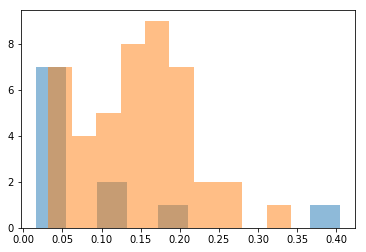

In [73]:
fig, ax = plt.subplots()
ax.hist(success, alpha=0.5)
ax.hist(failure, alpha=0.5)


In [74]:
stats.ranksums(failure, success)

RanksumsResult(statistic=2.7325396599297114, pvalue=0.0062848104427344316)

In [75]:
stats.ttest_ind(failure, success, equal_var=False)

Ttest_indResult(statistic=1.4499612377044, pvalue=0.17309250394789874)

# Test variability/robustness in distance

In [128]:
trees_dir = '../Data/euk_trees/*Rooted.MPAJH'
ideal_species_n = 31

# trees_dir = '../Data/pruned_euk_trees/*_9_meta.nwk.Rooted.MPAJH'
# ideal_species_n = 22

# trees_dir = '../Data/pruned_euk_trees/*_12_meta.nwk.Rooted.MPAJH'
# ideal_species_n = 19


# methods = ['.MPAJH', '.MLAJH']
methods = ['.MPAJH', '.MLAJH', '.MADAJH']
accuracy_dict = {}
for method in methods:
    accuracy_dict[method] = []

trees_tested = []
for tree_loc in glob.glob(trees_dir)[:]:
    print(tree_loc)
    test_tree = Phylo.read(tree_loc, 'newick', rooted=True)
    if len(test_tree.get_terminals()) != ideal_species_n:
        continue
    testy = [term for term in test_tree.get_terminals() if\
                      term.name in metazoa]
    valid = is_monophyletic_all(test_tree.root, test_tree, testy, False)
    if valid == False:
        continue
        
    trees_tested.append(tree_loc)
    for method in methods:
        my_tree = Phylo.read(tree_loc.replace('.MPAJH', method), 'newick', rooted=True)
        metazoa_clades = [term for term in my_tree.get_terminals() if\
                          term.name in metazoa]
        non_metazoa_clades = [term for term in my_tree.get_terminals() if\
                          term.name not in metazoa]

        if set(metazoa_clades) == set(my_tree.root.clades[0].get_terminals()) or \
            set(metazoa_clades) == set(my_tree.root.clades[1].get_terminals()):
            all_ca = my_tree.common_ancestor(non_metazoa_clades)
            accuracy_dict[method].append(my_tree.distance(all_ca, my_tree.root))

../Data/euk_trees/KOG0822.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG0815.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG3933.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG1314.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG0891.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG0594.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG1956.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG1390.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG1248.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG0257.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG3980.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG3739.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG2711.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG0743.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG2056.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG3049.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG0495.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG1860.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG4020.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG2946.faa.a

(array([ 164.,  102.,   43.,   17.,    2.,    2.,    5.,    1.,    0.,    3.]),
 array([ 0.00913 ,  0.534068,  1.059006,  1.583944,  2.108882,  2.63382 ,
         3.158758,  3.683696,  4.208634,  4.733572,  5.25851 ]),
 <a list of 10 Patch objects>)

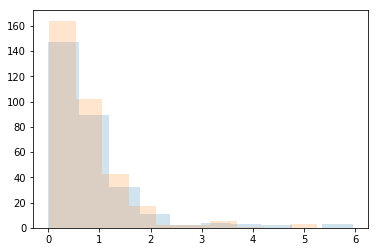

In [131]:
fig, ax = plt.subplots()
ax.hist(accuracy_dict['.MPAJH'], alpha=0.2)
# ax.hist(accuracy_dict['.MLAJH'], alpha=0.2)
ax.hist(accuracy_dict['.MADAJH'], alpha=0.2)

In [148]:
trees_dir = '../Data/euk_trees/*Rooted.MPAJH'
ideal_species_n = 31

# trees_dir = '../Data/pruned_euk_trees/*_9_meta.nwk.Rooted.MPAJH'
# ideal_species_n = 22

# trees_dir = '../Data/pruned_euk_trees/*_12_meta.nwk.Rooted.MPAJH'
# ideal_species_n = 19


# methods = ['.MPAJH', '.MLAJH']
methods = ['.MPAJH', '.MLAJH', '.MADAJH']
accuracy_dict = {}
for method in methods:
    accuracy_dict[method] = []

trees_tested = []
for tree_loc in glob.glob(trees_dir)[:50]:
    print(tree_loc)
    test_tree = Phylo.read(tree_loc, 'newick', rooted=True)
    if len(test_tree.get_terminals()) != ideal_species_n:
        continue
    testy = [term for term in test_tree.get_terminals() if\
                      term.name in metazoa]
    valid = is_monophyletic_all(test_tree.root, test_tree, testy, False)
    if valid == False:
        continue
        
    trees_tested.append(tree_loc)
    for method in methods:
        my_tree = Phylo.read(tree_loc.replace('.MPAJH', method), 'newick', rooted=True)
        metazoa_clades = [term for term in my_tree.get_terminals() if\
                          term.name in metazoa]
        non_metazoa_clades = [term for term in my_tree.get_terminals() if\
                          term.name not in metazoa]

        if set(metazoa_clades) == set(my_tree.root.clades[0].get_terminals()) or \
            set(metazoa_clades) == set(my_tree.root.clades[1].get_terminals()):
            all_ca = my_tree.common_ancestor(non_metazoa_clades)
            initial_dist = my_tree.distance(all_ca, my_tree.root)
        

            pruned_tree_loc = tree_loc.replace('/euk_trees/', '/pruned_euk_trees/')
            pruned_tree_loc = pruned_tree_loc.replace('.nwk.Rooted.MPAJH', '.pruned_9_meta.nwk.Rooted.MPAJH')
            pruned_tree_loc = pruned_tree_loc.replace('.MPAJH', method)
            pruned_tree = Phylo.read(pruned_tree_loc, 'newick', rooted=True)
            metazoa_clades = [term for term in pruned_tree.get_terminals() if\
                          term.name in metazoa]
            non_metazoa_clades = [term for term in pruned_tree.get_terminals() if\
                          term.name not in metazoa]

            if set(metazoa_clades) == set(pruned_tree.root.clades[0].get_terminals()) or \
                set(metazoa_clades) == set(pruned_tree.root.clades[1].get_terminals()):
                pruned_ca = pruned_tree.common_ancestor(non_metazoa_clades)
                pruned_dist = pruned_tree.distance(pruned_ca, pruned_tree.root)
#                 print(method, initial_dist, pruned_dist, initial_dist-pruned_dist)
#                 print(method, initial_dist-pruned_dist)
                accuracy_dict[method].append(initial_dist-pruned_dist)

../Data/euk_trees/KOG0822.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG0815.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG3933.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG1314.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG0891.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG0594.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG1956.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG1390.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG1248.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG0257.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG3980.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG3739.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG2711.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG0743.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG2056.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG3049.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG0495.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG1860.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG4020.faa.aln.nwk.Rooted.MPAJH
../Data/euk_trees/KOG2946.faa.a

(array([ 13.,   7.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.03684 ,  0.244088,  0.451336,  0.658584,  0.865832,  1.07308 ,
         1.280328,  1.487576,  1.694824,  1.902072,  2.10932 ]),
 <a list of 10 Patch objects>)

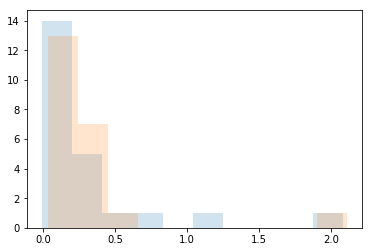

In [150]:
fig, ax = plt.subplots()
# ax.hist(accuracy_dict['.MPAJH'], alpha=0.2)
ax.hist(accuracy_dict['.MLAJH'], alpha=0.2)
ax.hist(accuracy_dict['.MADAJH'], alpha=0.2)